In [341]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [342]:
superstore_df = pd.read_csv(r'/Users/astridrestupersonal/Desktop/Ironhack Mini Project 2 Week 4/Sample_ Superstore.csv')

In [343]:
superstore_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Consumer,United States,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [344]:
superstore_df.shape

(9994, 19)

In [345]:
superstore_df.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,229.858001,3.789574,0.156203,28.656896
std,2885.163629,623.245101,2.225110,0.206452,234.260108
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000


In [346]:
superstore_df.columns = [column.lower().replace(" ","_") for column in superstore_df.columns]
superstore_df.columns

# can also do lambda function for the above:
# pd.Series(superstore_df.columns).apply(lambda col: col.lower())

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'segment', 'country', 'city', 'state', 'region',
       'product_id', 'category', 'sub-category', 'product_name', 'sales',
       'quantity', 'discount', 'profit'],
      dtype='object')

In [347]:
superstore_df.dtypes

row_id            int64
order_id         object
order_date       object
ship_date        object
ship_mode        object
customer_id      object
segment          object
country          object
city             object
state            object
region           object
product_id       object
category         object
sub-category     object
product_name     object
sales           float64
quantity          int64
discount        float64
profit          float64
dtype: object

In [348]:
superstore_df.select_dtypes("number").nunique().sort_values(ascending=False)

row_id      9994
profit      7287
sales       5825
quantity      14
discount      12
dtype: int64

In [349]:
list(set(superstore_df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [350]:
# Extracting column names with numerical data types from the dataframe
superstore_df.select_dtypes("number").columns

Index(['row_id', 'sales', 'quantity', 'discount', 'profit'], dtype='object')

In [352]:
# Counting and sorting the unique values for each numerical column in descending order
superstore_df.select_dtypes("number").nunique().sort_values(ascending=False)

row_id      9994
profit      7287
sales       5825
quantity      14
discount      12
dtype: int64

In [353]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
potential_categorical_from_numerical = superstore_df.select_dtypes("number").loc[:, superstore_df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

,quantity,discount
0,2,0.00
1,3,0.00
2,2,0.00
3,5,0.45
4,2,0.20
...,...,...
9989,3,0.20
9990,2,0.00
9991,2,0.20
9992,4,0.00


In [354]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
superstore_df_categorical = pd.concat([superstore_df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

In [355]:
superstore_df_categorical.head(5)

,order_id,order_date,ship_date,ship_mode,customer_id,segment,country,city,state,region,product_id,category,sub-category,product_name,quantity,discount
0,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,2,0.00
1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,0.00
2,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2,0.00
3,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,5,0.45
4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2,0.20


In [365]:
# Adjusting the numerical dataframe by manually removing the "object" columns as I wanted to keep discount in.
# Instead of superstore_df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)
# Instead of removing the "row_id" column from the dataframe
# superstore_df_numerical.drop("row_id", inplace=True, axis=1)

superstore_df_numerical = superstore_df.drop(
    ['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
     'customer_id', 'segment', 'country', 'city', 'state', 'region',
     'product_id', 'category', 'sub-category', 'product_name', 'quantity'],
    axis=1)


In [366]:
superstore_df_numerical.head(5)

,sales,discount,profit
0,261.9600,0.00,41.9136
1,731.9400,0.00,219.5820
2,14.6200,0.00,6.8714
3,957.5775,0.45,-383.0310
4,22.3680,0.20,2.5164


In [367]:
superstore_df.isnull().sum()
# no nulls in the data

row_id          0
order_id        0
order_date      0
ship_date       0
ship_mode       0
customer_id     0
segment         0
country         0
city            0
state           0
region          0
product_id      0
category        0
sub-category    0
product_name    0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

In [368]:
# Identifying columns in the dataframe where over 80% of the values are missing
superstore_df.columns[superstore_df.isnull().mean() > 0.8]

Index([], dtype='object')

In [369]:
superstore_df.select_dtypes("object").nunique().sort_values(ascending=False)

order_id        5009
product_id      1862
product_name    1850
ship_date       1334
order_date      1237
customer_id      793
city             531
state             49
sub-category      17
ship_mode          4
region             4
segment            3
category           3
country            1
dtype: int64

In [370]:
# 1. Do higher discounts lead to lower profitability?
# Discount and Profit
# So need Numerical/Numerical = Pearson/spearman
# Pearson
# Negative values: as one variable increases the other decreases
# not linear, medium negative correlation.
correlation = superstore_df['discount'].corr(superstore_df['profit'])
correlation

np.float64(-0.21948745637176803)

In [371]:
# Calculating the Spearman rank correlation between 'discount' and 'profit' 
# Negative values: as one variable increases the other decreases
# monotonic, high correlation
correlation = superstore_df['discount'].corr(superstore_df['profit'], method='spearman')
correlation

np.float64(-0.5433501822306213)

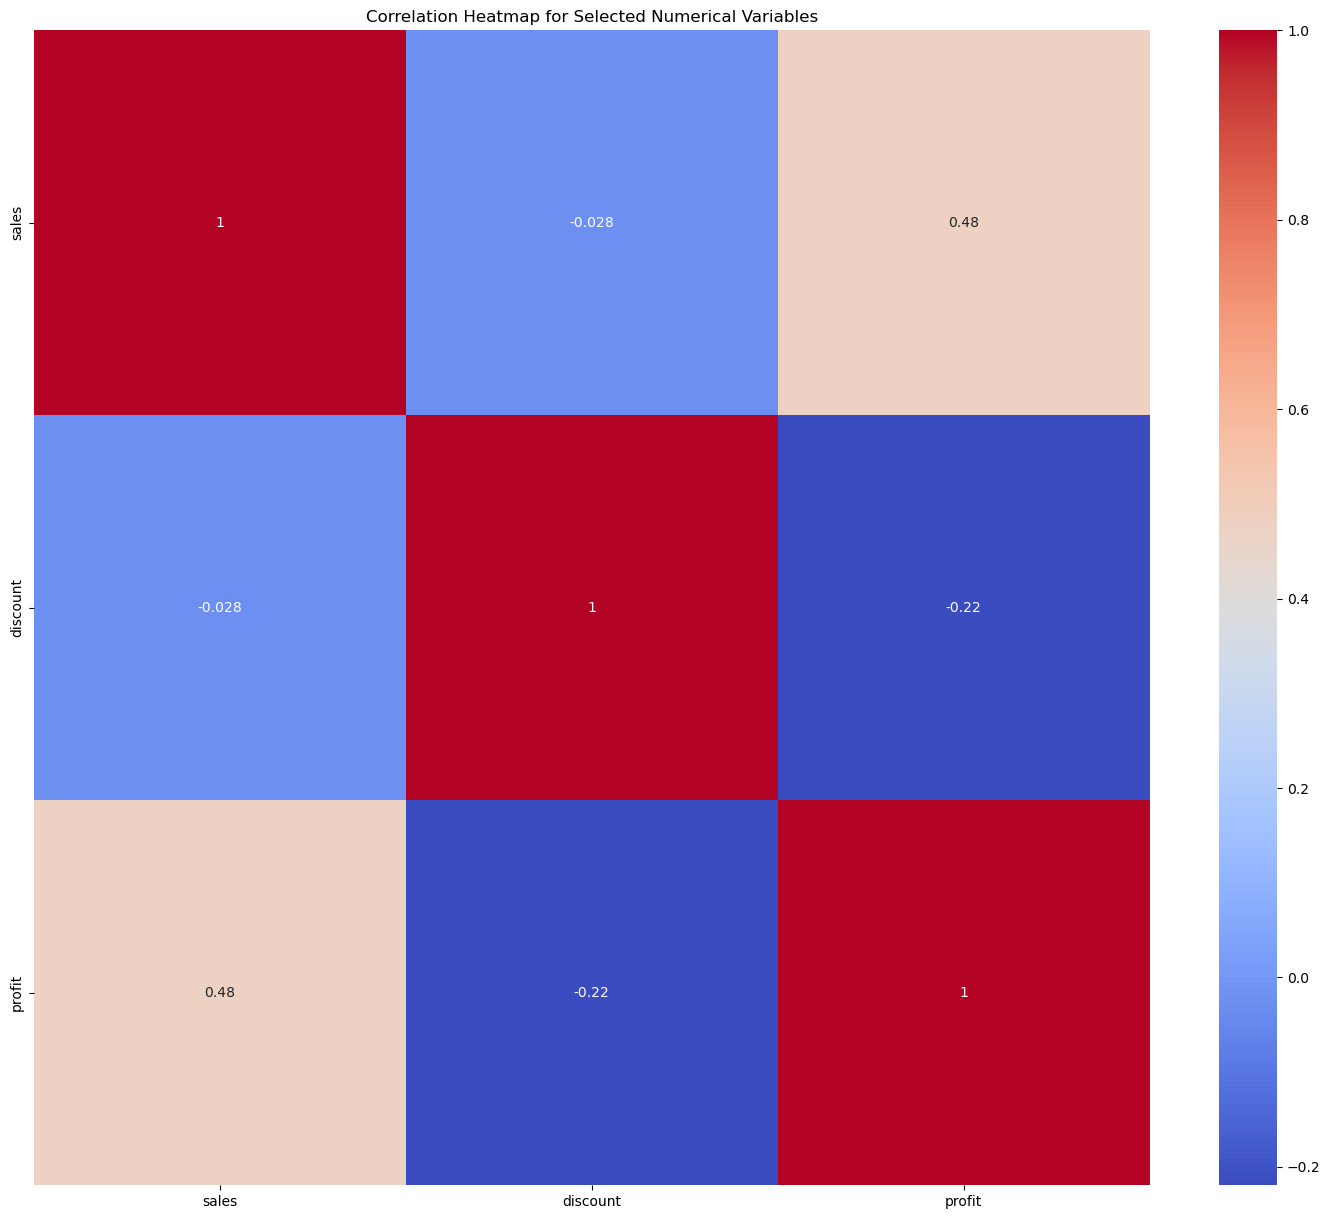

In [372]:
# Correlation heat map Pearson from the superstore_df_numerical created earlier:
correlation_matrix = superstore_df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

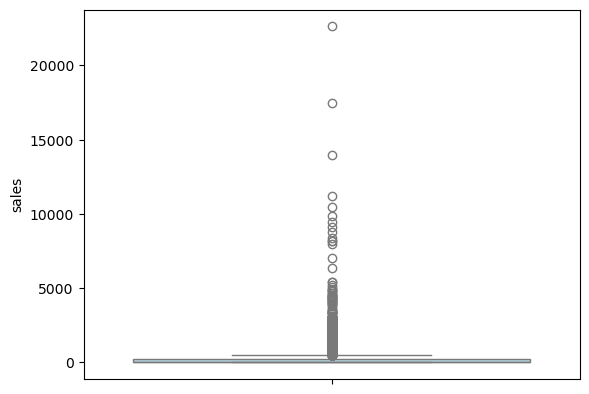

In [373]:
# need to remove the outliers as there are only 3 main ones
# and won't massively influence the overall data
sns.boxplot(data = superstore_df['sales'], color="lightblue")
plt.show()

In [131]:
def tukeys_test_outliers(data): # can amend to (data, column_name)
    Q1 = data.quantile(0.25) # data[column_name].quantile(0.25)
    Q3 = data.quantile(0.75) # data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)] # data[column_name] 
    
    return outliers

In [374]:
outliers = tukeys_test_outliers(superstore_df["sales"])
outliers

1        731.9400
3        957.5775
7        907.1520
10      1706.1840
11       911.4240
          ...    
9931     683.3320
9942     998.8200
9947    1925.8800
9948    2405.2000
9968     735.9800
Name: sales, Length: 1167, dtype: float64

In [375]:
outliers.sort_values(ascending=False)

2697    22638.480
6826    17499.950
8153    13999.960
2623    11199.968
4190    10499.970
          ...    
3731      499.990
2263      499.980
5619      499.950
2968      499.584
8594      499.168
Name: sales, Length: 1167, dtype: float64

In [376]:
superstore_df_no_outliers = superstore_df[superstore_df["sales"] < 13999.960]
superstore_df_no_outliers

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,segment,country,city,state,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Consumer,United States,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


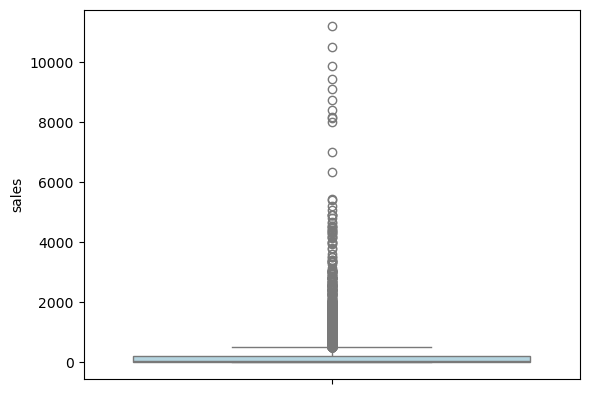

In [377]:
sns.boxplot(data = superstore_df_no_outliers['sales'], color="lightblue")
plt.show()

In [379]:
frequency_table = superstore_df['category'].value_counts()
frequency_table

category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

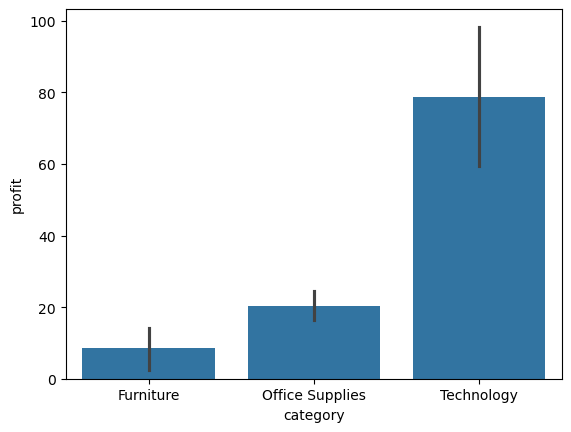

In [380]:
# 2: There is more profit on average in the tech category than the other categories.
# Categorical VS Numerical
# Bar chart best - shows the mean already
# maybe violin
sns.barplot( x=superstore_df["category"], y=superstore_df["profit"])
plt.show()

/var/folders/bv/pz5wwd1x5nb7wmxlylb_sd4c0000gq/T/ipykernel_27395/2489715957.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=superstore_df_no_outliers, x='category', y='profit', palette="coolwarm")


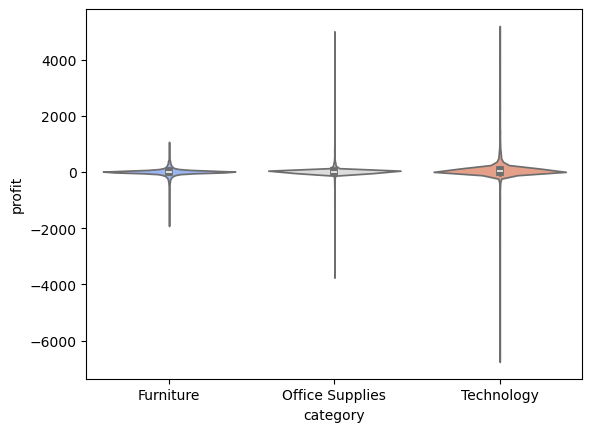

In [381]:
sns.violinplot(data=superstore_df_no_outliers, x='category', y='profit', palette="coolwarm")
plt.show()

In [382]:
# df.groupby in code group by category, show mean
# 2.4 aggregating data notes (Ramy sent on slack)
superstore_df.groupby('category')['profit'].agg(['mean']).sort_values(by="mean", ascending=False)

,mean
category,
Technology,78.752002
Office Supplies,20.327050
Furniture,8.699327


In [383]:
min_date = superstore_df['order_date'].min()
max_date = superstore_df['order_date'].max()

In [385]:
min_date

'01-01-2017'

In [386]:
max_date

'9/30/2017'

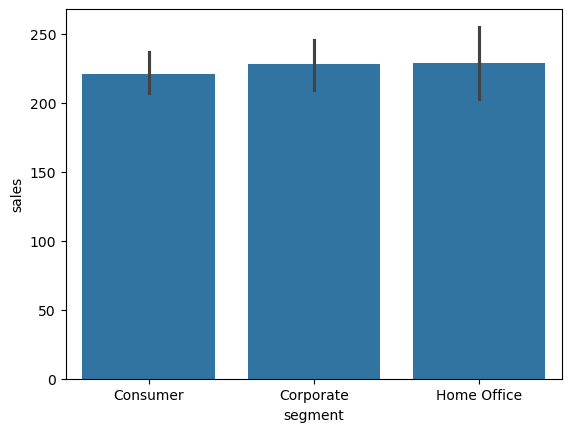

In [387]:
# 3: On average do Corporate spend more than consumer and home office?
# Categorical 'segment' and numberical 'sales' 
# bar chart best
# maybe vioin
# used no outliers df
# not enough evidence to prove my hypothesis completelt wrong, only a sample, for a limited duration (9 months).

sns.barplot( x=superstore_df_no_outliers["segment"], y=superstore_df["sales"])
plt.show()

In [388]:
superstore_df_no_outliers.groupby('segment')['sales'].agg(['mean']).sort_values(by='mean', ascending=False)

,mean
segment,
Home Office,228.403293
Corporate,228.104146
Consumer,221.079265


/var/folders/bv/pz5wwd1x5nb7wmxlylb_sd4c0000gq/T/ipykernel_27395/3239068533.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=superstore_df_no_outliers, x='segment', y='sales', palette="coolwarm")


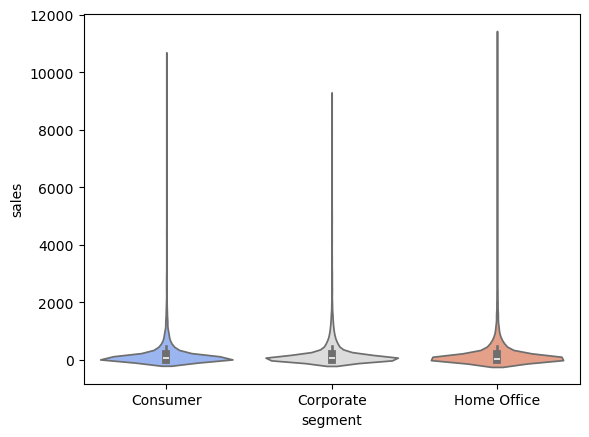

In [389]:
sns.violinplot(data=superstore_df_no_outliers, x='segment', y='sales', palette="coolwarm")
plt.show()

In [390]:
superstore_df_no_outliers.to_excel("/Users/astridrestupersonal/Downloads/superstore_df.xlsx")

In [392]:
superstore_df_no_outliers

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,segment,country,city,state,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Consumer,United States,Miami,Florida,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Consumer,United States,Costa Mesa,California,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200
